In [1]:
# Modelo
from sklearn.svm import SVC

# Preprocessing
import utils
import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

# Metrics
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Plots
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# No supervisado
from sklearn.manifold import TSNE

### Preprocessing Base

In [2]:
df = preprocessing.preprocessing_base_parte_1(utils.feature_engineering(utils.get_data()))

In [3]:
params = { 'C': np.linspace(0.1, 3, 100), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }
model = SVC(probability=True)

In [4]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, cv=4, verbose = 10)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('tiene_alto_valor_adquisitivo',1), df['tiene_alto_valor_adquisitivo'], random_state=112)

In [ ]:
%%time
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

Fitting 4 folds for each of 400 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.1min


In [13]:
gscv.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
score

In [ ]:
print(classification_report(y_test,gscv.predict(X_test)))

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

In [ ]:
plot_roc_curve(gscv, X_test, y_test)

### Preprocessing Significantes

In [14]:
df, pa = preprocessing.preprocessing_significantes(utils.feature_engineering(utils.get_data()))

In [15]:
params = { 'C': np.linspace(0.1, 3, 100), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }
model = SVC(probability=True)

In [16]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, cv=4, verbose = 10)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df, pa, random_state=112)

In [18]:
%%time
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

Fitting 4 folds for each of 400 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 46.4min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 56.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 63.7min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 73.7min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 81.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 93.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 103.9min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 1

CPU times: user 2min 26s, sys: 72 ms, total: 2min 26s
Wall time: 16h 39min 21s


In [19]:
gscv.best_params_

{'C': 2.4434343434343435, 'kernel': 'rbf'}

In [20]:
score

0.883605418685776

In [21]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6182
           1       0.69      0.58      0.63      1959

    accuracy                           0.84      8141
   macro avg       0.78      0.75      0.76      8141
weighted avg       0.83      0.84      0.83      8141



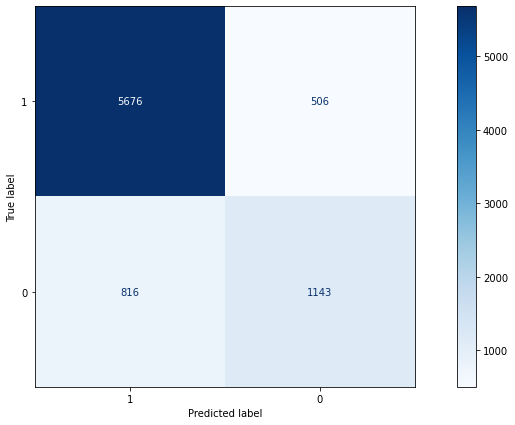

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

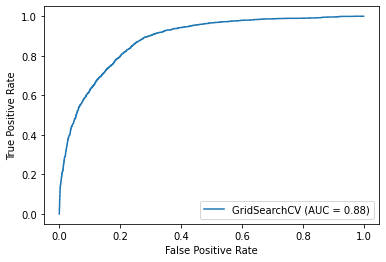

In [23]:
plot_roc_curve(gscv, X_test, y_test)

### Mejor separación por TSNE

A continuación, buscaremos la mejor combinación de atributos de forma tal que generen un patrón observable con TSNE.

In [2]:
df = utils.feature_engineering(utils.get_data())

In [3]:
def dejar_variables_continuas(X):
    return X[['anios_estudiados', 'ganancia_perdida_declarada_bolsa_argentina',
              'edad', 'horas_trabajo_registradas']].copy()

In [4]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
X = pd.get_dummies(X)
Y = df['tiene_alto_valor_adquisitivo']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=112)

### 1) Análisis sólo de variables continuas

In [5]:
scaler1 = MinMaxScaler(feature_range=(0,1))

X_train1 = pd.DataFrame(scaler1.fit_transform(dejar_variables_continuas(X_train)))
X_test1 = pd.DataFrame(scaler1.transform(dejar_variables_continuas(X_test)))

In [7]:
X_tsne = TSNE(n_components=2, perplexity=100, learning_rate=400, n_iter_without_progress=500, n_jobs=-1, verbose=4).fit_transform(X_train1)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 24420 samples in 0.146s...
[t-SNE] Computed neighbors for 24420 samples in 1.594s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24420
[t-SNE] Computed conditional probabilities for sample 2000 / 24420
[t-SNE] Computed conditional probabilities for sample 3000 / 24420
[t-SNE] Computed conditional probabilities for sample 4000 / 24420
[t-SNE] Computed conditional probabilities for sample 5000 / 24420
[t-SNE] Computed conditional probabilities for sample 6000 / 24420
[t-SNE] Computed conditional probabilities for sample 7000 / 24420
[t-SNE] Computed conditional probabilities for sample 8000 / 24420
[t-SNE] Computed conditional probabilities for sample 9000 / 24420
[t-SNE] Computed conditional probabilities for sample 10000 / 24420
[t-SNE] Computed conditional probabilities for sample 11000 / 24420
[t-SNE] Computed conditional probabilities for sample 12000 / 24420
[t-SNE] Computed conditional probabilities for sa

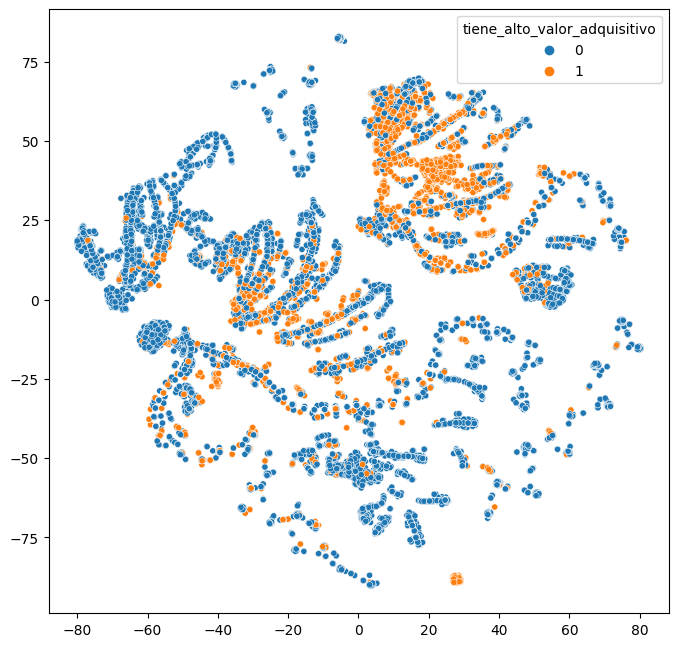

In [9]:
fig = plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(
    x = X_tsne[:,0],
    y = X_tsne[:,1],
    hue = y_train,
    s=20
)

plt.show()

Podemos ver que la separación no es mala, se puede llegar a un modelo decente entrenando un SVM

### Entrenando el primer modelo

In [11]:
params = [{'kernel': ['linear'], 'C': np.logspace(-3, 2, 6)},
          {'kernel': ['poly'], 'C': np.logspace(-3, 2, 6), 'degree': range(2, 4)},
          {'kernel': ['rbf'], 'C': np.logspace(-3, 2, 6) ,'gamma': [0.01, 0.001, 0.0001]}
         ]
model = SVC()

gscv1 = GridSearchCV(model, params, scoring='roc_auc', n_jobs=6, verbose = 4, cv=5)

In [71]:
%%time
gscv1.fit(X_train1, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   33.9s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  7.8min
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed: 20.2min finished


CPU times: user 9min 3s, sys: 643 ms, total: 9min 3s
Wall time: 29min 16s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=6,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['linear']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'degree': range(2, 4), 'kernel': ['poly']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}],
             scoring='roc_auc', verbose=4)

### El mejor modelo:

In [87]:
print(gscv1.best_estimator_)
print(gscv1.best_params_)
print(gscv1.best_score_)

SVC(C=100.0, kernel='poly')
{'C': 100.0, 'degree': 3, 'kernel': 'poly'}
0.845228957392133


##### Observaciones

Los mejores modelos se obtuvieron con un kernel polinómico de grado 3... por mucho superiores a los demás kernels, lo mejor será elegir un C similar al obtenido para el mejor de grado 3 y seguir probando con polinomios de mayor orden.

In [94]:
gscv1.cv_results_

{'mean_fit_time': array([  8.71375813,  11.16395311,  11.52420287,  12.0144938 ,
         16.48273082,  75.35419245,   7.21978579,  10.35267949,
          9.95198026,  12.29559202,  11.87093592,  13.09892321,
         15.08375087,  25.71390147,  31.47045698, 105.04646883,
        111.21768599, 705.01004105,   9.19617963,   9.5313343 ,
          8.58990393,   9.27688875,   9.00481181,   8.97303104,
         10.72479277,  10.12377958,   8.38229055,  10.6140368 ,
         11.76341929,  10.69462109,  12.92453828,  11.59022255,
         12.33325787,  12.65302052,  12.6587707 ,  11.8534328 ]),
 'std_fit_time': array([ 0.45080598,  0.90351916,  0.64299743,  0.97676041,  1.25017814,
         3.66262592,  1.08269455,  2.03329831,  1.68537051,  1.25781552,
         0.50810614,  1.11128993,  0.41403375,  1.70526566,  5.55963124,
         7.10226101,  8.08168516, 62.10984821,  0.54537765,  0.70023946,
         0.48521863,  0.7180118 ,  0.85579947,  0.20442649,  0.95932281,
         0.57457128,  0.

In [109]:
print(classification_report(y_test,gscv1.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6182
           1       0.83      0.28      0.42      1959

    accuracy                           0.81      8141
   macro avg       0.82      0.63      0.66      8141
weighted avg       0.82      0.81      0.78      8141



Podemos ver que se obtienen valores regulares. Un accuracy del 81% es regular. Además el recall de 1s es pésimo.

Por lo cual, considero que la selección de variables fue un tanto "pobre". Veamos con otras combinaciones.

### Las primeras variables continuas utilizadas en un árbol de decisión

La idea es ver con el árbol de decisión aquellas variables que mejor "dividen" el espacio para predecir, por ende usaremos un árbol para ver qué nodos tomó en cada nivel.


In [6]:
from sklearn.tree import DecisionTreeClassifier

import graphviz
import dtreeviz.trees as dtreeviz

In [7]:
arbol = DecisionTreeClassifier(criterion='gini', max_depth=3)
arbol.fit(X_train1, y_train)

DecisionTreeClassifier(max_depth=3)

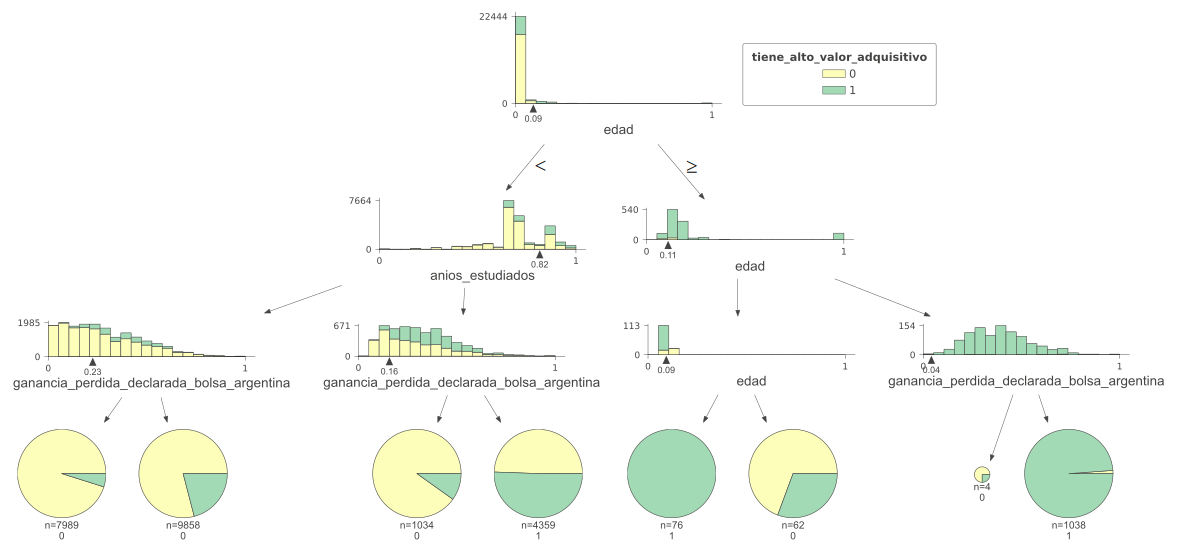

In [8]:
viz = dtreeviz.dtreeviz(
    arbol,
    X_train1,
    y_train,
    target_name='tiene_alto_valor_adquisitivo',
    feature_names=list(X.columns),
    class_names=list([0,1]),
    scale=1.5,
)

display(viz)

Se ve aquí que efectivamente se utilizan las siguientes 3 variables:
 * Edad
 * Ganancia/Pérdida declarada en la bolsa argentina
 * Años estudiados
Lo que quiere decir que, las horas trabajadas "no dividen tan bien" al espacio según el árbol de decisión.

In [9]:
def dejar_mejores_variables_continuas(X):
    return X[['anios_estudiados', 'ganancia_perdida_declarada_bolsa_argentina',
              'edad']].copy()

In [12]:
scaler2 = MinMaxScaler(feature_range=(0,1))

X_train2 = pd.DataFrame(scaler2.fit_transform(dejar_mejores_variables_continuas(X_train)))
X_test2 = pd.DataFrame(scaler2.transform(dejar_mejores_variables_continuas(X_test)))

Veamos si TSNE nos muestra algo interesante:

In [143]:
X_tsne = TSNE(n_components=2, perplexity=200, learning_rate=100, n_iter_without_progress=250, n_jobs=-1, verbose=4).fit_transform(X_train2)

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 24420 samples in 0.147s...
[t-SNE] Computed neighbors for 24420 samples in 3.088s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24420
[t-SNE] Computed conditional probabilities for sample 2000 / 24420
[t-SNE] Computed conditional probabilities for sample 3000 / 24420
[t-SNE] Computed conditional probabilities for sample 4000 / 24420
[t-SNE] Computed conditional probabilities for sample 5000 / 24420
[t-SNE] Computed conditional probabilities for sample 6000 / 24420
[t-SNE] Computed conditional probabilities for sample 7000 / 24420
[t-SNE] Computed conditional probabilities for sample 8000 / 24420
[t-SNE] Computed conditional probabilities for sample 9000 / 24420
[t-SNE] Computed conditional probabilities for sample 10000 / 24420
[t-SNE] Computed conditional probabilities for sample 11000 / 24420
[t-SNE] Computed conditional probabilities for sample 12000 / 24420
[t-SNE] Computed conditional probabilities for sa

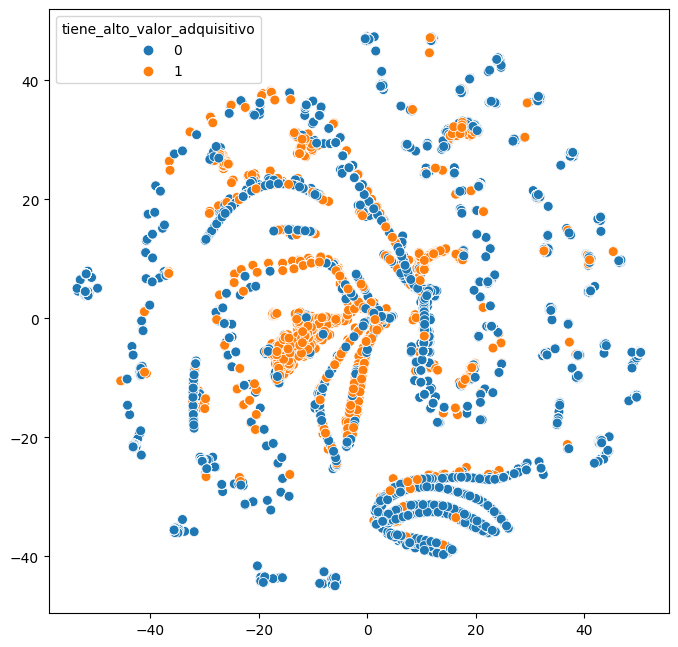

In [145]:
fig = plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(
    x = X_tsne[:,0],
    y = X_tsne[:,1],
    hue = y_train,
    s=50
)

plt.show()

No parece haber ningún tipo de patrón visible, probablemente SVM no pueda hacer un buen trabajo...


Veamos qué ocurre si probamos con un kernel radial y uno polinómico

In [13]:
params = [{'kernel': ['poly'], 'C': np.logspace(-3, 2, 6), 'degree': range(2, 4)},
          {'kernel': ['rbf'], 'C': np.logspace(-3, 2, 6) ,'gamma': [0.01, 0.001, 0.0001]}
         ]
model = SVC()

gscv3 = GridSearchCV(model, params, scoring='roc_auc', n_jobs=6, verbose = 4, cv=4)

In [149]:
%%time
gscv3.fit(X_train2, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   25.5s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  6.9min
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed: 10.1min finished


CPU times: user 5min 47s, sys: 387 ms, total: 5min 47s
Wall time: 15min 50s


GridSearchCV(cv=4, estimator=SVC(), n_jobs=6,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'degree': range(2, 4), 'kernel': ['poly']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}],
             scoring='roc_auc', verbose=4)

### El mejor modelo:

In [151]:
print(gscv3.best_estimator_)
print(gscv3.best_params_)
print(gscv3.best_score_)

SVC(C=100.0, kernel='poly')
{'C': 100.0, 'degree': 3, 'kernel': 'poly'}
0.8330478708092884


Vemos que el modelo es el mismo que antes...

In [154]:
print(classification_report(y_test,gscv3.predict(X_test2)))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      6182
           1       0.87      0.25      0.39      1959

    accuracy                           0.81      8141
   macro avg       0.84      0.62      0.64      8141
weighted avg       0.82      0.81      0.77      8141



Con valores e interpretaciones similares a las anteriores.

### Veamos qué sucede si elegimos las primeras variables (no sólo continuas) que elije un árbol de decisión de altura 3. 

In [14]:
arbol = DecisionTreeClassifier(criterion='gini', max_depth=3)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

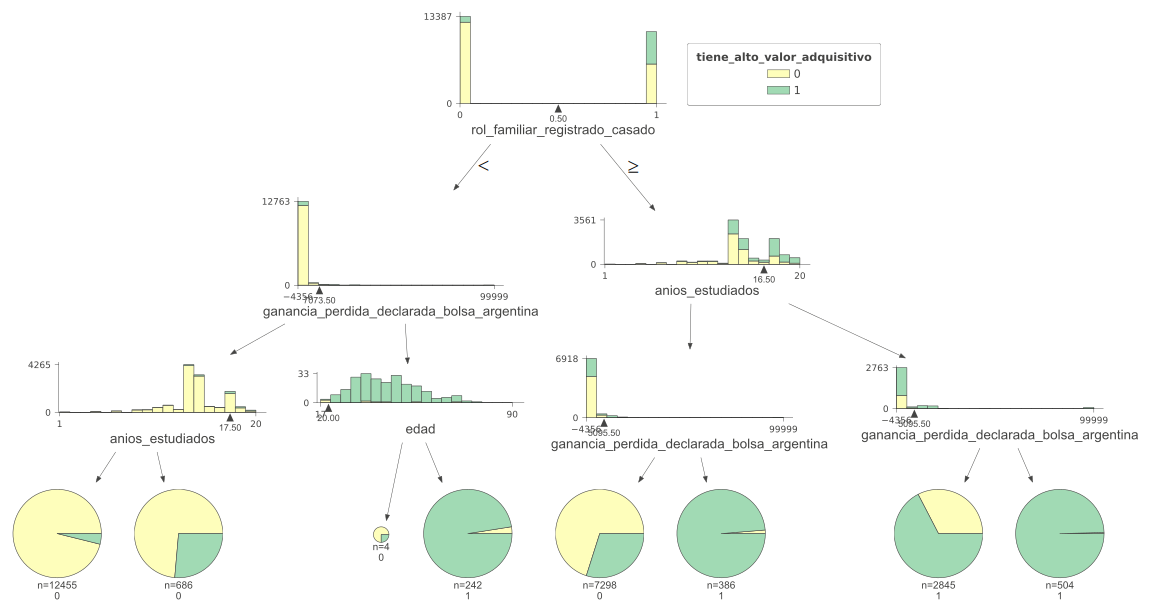

In [15]:
viz = dtreeviz.dtreeviz(
    arbol,
    X_train,
    y_train,
    target_name='tiene_alto_valor_adquisitivo',
    feature_names=list(X.columns),
    class_names=list([0,1]),
    scale=1.5,
)

display(viz)

Vemos de este árbol que las variables elegidas fueron:

* Rol familiar registrado casado
* Ganancia/Pérdida declarada en la bolsa argentina.
* Años estudiados.
* Edad

Por lo que sólo se agregó una variable (dummy) a las 3 previamente seleccionadas.


In [16]:
def primeras_4_del_arbol(X):
    return X[['anios_estudiados', 'ganancia_perdida_declarada_bolsa_argentina',
              'edad', 'rol_familiar_registrado_casado']].copy()

In [17]:
scaler3 = MinMaxScaler(feature_range=(0,1))

X_train3 = pd.DataFrame(scaler3.fit_transform(primeras_4_del_arbol(X_train)))
X_test3 = pd.DataFrame(scaler3.transform(primeras_4_del_arbol(X_test)))

Nuevamente veamos qué nos dice TSNE

In [164]:
X_tsne = TSNE(n_components=2, perplexity=100, learning_rate=100, n_iter_without_progress=250, n_jobs=-1, verbose=4).fit_transform(X_train3)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 24420 samples in 0.160s...
[t-SNE] Computed neighbors for 24420 samples in 1.371s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24420
[t-SNE] Computed conditional probabilities for sample 2000 / 24420
[t-SNE] Computed conditional probabilities for sample 3000 / 24420
[t-SNE] Computed conditional probabilities for sample 4000 / 24420
[t-SNE] Computed conditional probabilities for sample 5000 / 24420
[t-SNE] Computed conditional probabilities for sample 6000 / 24420
[t-SNE] Computed conditional probabilities for sample 7000 / 24420
[t-SNE] Computed conditional probabilities for sample 8000 / 24420
[t-SNE] Computed conditional probabilities for sample 9000 / 24420
[t-SNE] Computed conditional probabilities for sample 10000 / 24420
[t-SNE] Computed conditional probabilities for sample 11000 / 24420
[t-SNE] Computed conditional probabilities for sample 12000 / 24420
[t-SNE] Computed conditional probabilities for sa

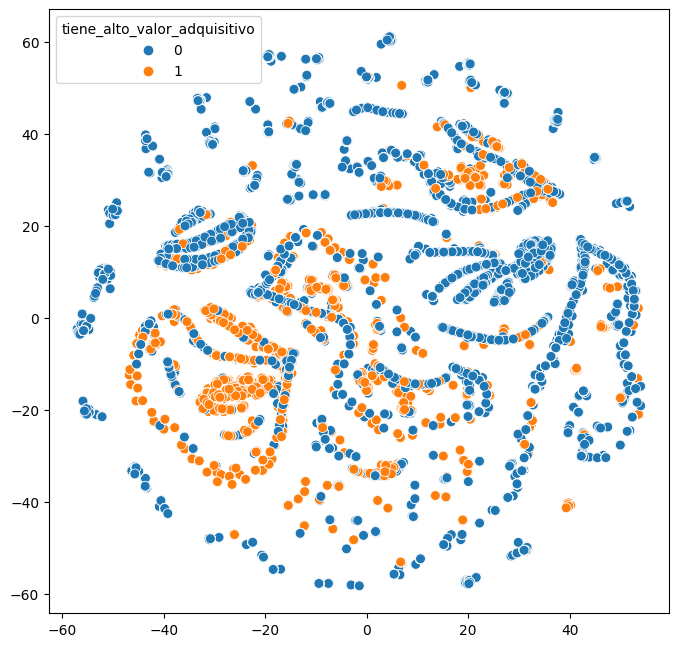

In [166]:
fig = plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(
    x = X_tsne[:,0],
    y = X_tsne[:,1],
    hue = y_train,
    s=50
)

plt.show()

No parece haber un patrón, pero quizá algo se saca con un kernel radial.

In [18]:
params = {'kernel': ['rbf'], 'C': np.logspace(-4, 3, 8) ,'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
model = SVC()

gscv4 = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, verbose = 4, cv=4)

In [190]:
%%time
gscv4.fit(X_train3, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  5.5min finished


CPU times: user 41.5 s, sys: 309 ms, total: 41.8 s
Wall time: 6min 13s


GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=4)

In [198]:
print(gscv4.best_estimator_)
print(gscv4.best_params_)
print(gscv4.best_score_)

SVC(C=1000.0, gamma=1)
{'C': 1000.0, 'gamma': 1, 'kernel': 'rbf'}
0.8446764946764947


In [205]:
print(classification_report(y_test,gscv4.predict(X_test3)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6182
           1       0.75      0.51      0.61      1959

    accuracy                           0.84      8141
   macro avg       0.81      0.73      0.75      8141
weighted avg       0.83      0.84      0.83      8141



### Veamos las variables (no continuas) que usa el árbol

In [19]:
arbol = DecisionTreeClassifier(criterion='gini', max_depth=3)
arbol.fit(X_train[X_train.columns.drop(['anios_estudiados', 'edad', 'ganancia_perdida_declarada_bolsa_argentina', 'horas_trabajo_registradas'])], y_train)

DecisionTreeClassifier(max_depth=3)

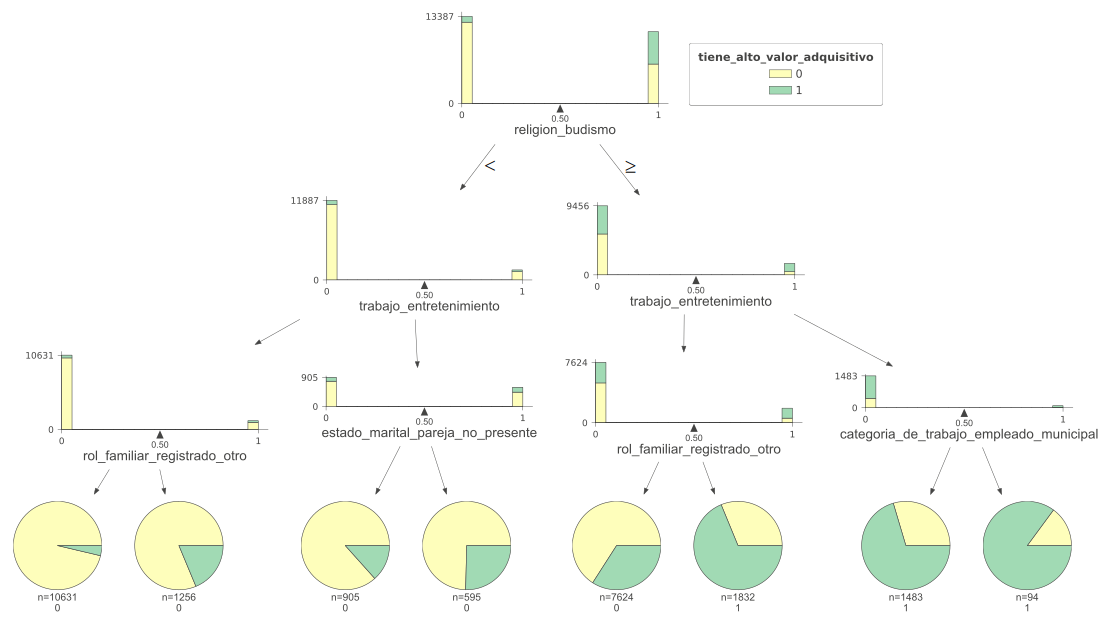

In [20]:
viz = dtreeviz.dtreeviz(
    arbol,
    X_train[X_train.columns.drop(['anios_estudiados', 'edad', 'ganancia_perdida_declarada_bolsa_argentina', 'horas_trabajo_registradas'])],
    y_train,
    target_name='tiene_alto_valor_adquisitivo',
    feature_names=list(X.columns),
    class_names=list([0,1]),
    scale=1.5,
)

display(viz)

### Variables que nos vamos a quedar

* religion_budismo
* trabajo_entretenimiento
* rol_familiar_registrado_otro


In [21]:
# La función deja las continuas que resultaron significativas para los previos árboles, la variable de 
# rol_familiar_registrado_casado pues antes también había resultado importante junto a las continuas.
# Pero además suma las 3 variables arriba mencionadas.
def quedarse_las_importantes(X):
    return X[['anios_estudiados', 'ganancia_perdida_declarada_bolsa_argentina',
              'edad', 'rol_familiar_registrado_casado', 'religion_budismo', 
              'trabajo_entretenimiento', 'rol_familiar_registrado_otro']].copy()

In [22]:
scaler4 = MinMaxScaler(feature_range=(0,1))

X_train4 = pd.DataFrame(scaler4.fit_transform(quedarse_las_importantes(X_train)))
X_test4 = pd.DataFrame(scaler4.transform(quedarse_las_importantes(X_test)))

In [23]:
params = [{'kernel': ['linear'], 'C': np.logspace(-3, 2, 6)},
          {'kernel': ['poly'], 'C': np.logspace(-3, 2, 6), 'degree': range(2, 4)},
          {'kernel': ['rbf'], 'C': np.logspace(-3, 2, 6) ,'gamma': [0.01, 0.001, 0.0001]}
         ]
model = SVC()

gscv6 = GridSearchCV(model, params, scoring='accuracy', n_jobs=6, verbose = 4, cv=4)

In [19]:
%%time
gscv6.fit(X_train4, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   26.5s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 144 out of 144 | elapsed:  6.1min finished


CPU times: user 1min 3s, sys: 224 ms, total: 1min 3s
Wall time: 7min 10s


GridSearchCV(cv=4, estimator=SVC(), n_jobs=6,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['linear']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'degree': range(2, 4), 'kernel': ['poly']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}],
             scoring='accuracy', verbose=4)

In [22]:
print(gscv6.best_estimator_)
print(gscv6.best_params_)
print(gscv6.best_score_)

SVC(C=100.0, kernel='poly')
{'C': 100.0, 'degree': 3, 'kernel': 'poly'}
0.8425880425880425


In [23]:
print(classification_report(y_test,gscv6.predict(X_test4)))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6182
           1       0.74      0.51      0.61      1959

    accuracy                           0.84      8141
   macro avg       0.80      0.73      0.75      8141
weighted avg       0.83      0.84      0.83      8141



### Conclusiones

Los modelos con SVM no parecen ser muy adecuados, sin embargo se logró obtener un accuracy similar al tp1 con este modelo... será para tener en cuenta. Sin embargo sirvió para darse una idea de cómo están distribuidos nuestros datos.


## PCA y t-SNE

In [2]:
df = utils.feature_engineering(utils.get_data)

AttributeError: 'function' object has no attribute 'copy'

In [ ]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
X = pd.get_dummies(X)
Y = df['tiene_alto_valor_adquisitivo']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=27)

In [25]:
pca = PCA()
scaler = StandardScaler()

X_train = pd.DataFrame(pca.fit_transform(scaler.fit_transform(X_train)))
X_test = pd.DataFrame(pca.transform(scaler.transform(X_test)))

In [26]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14992892, 0.21673695, 0.28247612, 0.34409664, 0.3913932 ,
       0.43675049, 0.47895379, 0.51559625, 0.54903663, 0.5773459 ,
       0.60433116, 0.6297307 , 0.65292694, 0.6748618 , 0.69570912,
       0.71506207, 0.73418215, 0.75198713, 0.76917763, 0.78415143,
       0.7970272 , 0.80980622, 0.82251915, 0.83413289, 0.84565238,
       0.85708062, 0.86833038, 0.87835416, 0.88753672, 0.89661359,
       0.9056595 , 0.91455654, 0.92175991, 0.92856523, 0.93435835,
       0.93939987, 0.9427868 , 0.94595361, 0.94894556, 0.95184817,
       0.95456613, 0.95716984, 0.95975959, 0.96210425, 0.9644342 ,
       0.96640207, 0.96829667, 0.97010926, 0.97191125, 0.97369026,
       0.97532763, 0.97687773, 0.97838688, 0.97986333, 0.98117729,
       0.98243461, 0.9836735 , 0.984906  , 0.98613183, 0.98718079,
       0.98816686, 0.98913818, 0.98987421, 0.99059855, 0.99130005,
       0.99199242, 0.99263477, 0.99325521, 0.99387088, 0.99447386,
       0.99505022, 0.99561833, 0.99612848, 0.9966253 , 0.99707

In [64]:
for i in np.linspace(0.70, 0.95, 6):
    n = np.argmax(np.cumsum(pca.explained_variance_ratio_) > round(i, 2))
    print("Cantidad necesaria para explicar " + str(round(i, 2)) + "\tes " + str(n))

Cantidad necesaria para explicar 0.7	es 15
Cantidad necesaria para explicar 0.75	es 17
Cantidad necesaria para explicar 0.8	es 21
Cantidad necesaria para explicar 0.85	es 25
Cantidad necesaria para explicar 0.9	es 30
Cantidad necesaria para explicar 0.95	es 39


### 70% de la varianza

Se alcanza con 15 variables de PCA.

In [67]:
pca = PCA(15)
scaler = StandardScaler()

X_train70 = pd.DataFrame(pca.fit_transform(scaler.fit_transform(X_train)))
X_test70 = pd.DataFrame(pca.transform(scaler.transform(X_test)))

#### Veamos cómo se comportó la transformación en una dimensión menor, para ello usaremos t-SNE

In [68]:
X_tsne = TSNE(n_components=2, perplexity=100, learning_rate=400, n_iter_without_progress=500, n_jobs=6, verbose=4).fit_transform(X_train70)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 24420 samples in 0.055s...
[t-SNE] Computed neighbors for 24420 samples in 3.941s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24420
[t-SNE] Computed conditional probabilities for sample 2000 / 24420
[t-SNE] Computed conditional probabilities for sample 3000 / 24420
[t-SNE] Computed conditional probabilities for sample 4000 / 24420
[t-SNE] Computed conditional probabilities for sample 5000 / 24420
[t-SNE] Computed conditional probabilities for sample 6000 / 24420
[t-SNE] Computed conditional probabilities for sample 7000 / 24420
[t-SNE] Computed conditional probabilities for sample 8000 / 24420
[t-SNE] Computed conditional probabilities for sample 9000 / 24420
[t-SNE] Computed conditional probabilities for sample 10000 / 24420
[t-SNE] Computed conditional probabilities for sample 11000 / 24420
[t-SNE] Computed conditional probabilities for sample 12000 / 24420
[t-SNE] Computed conditional probabilities for sa

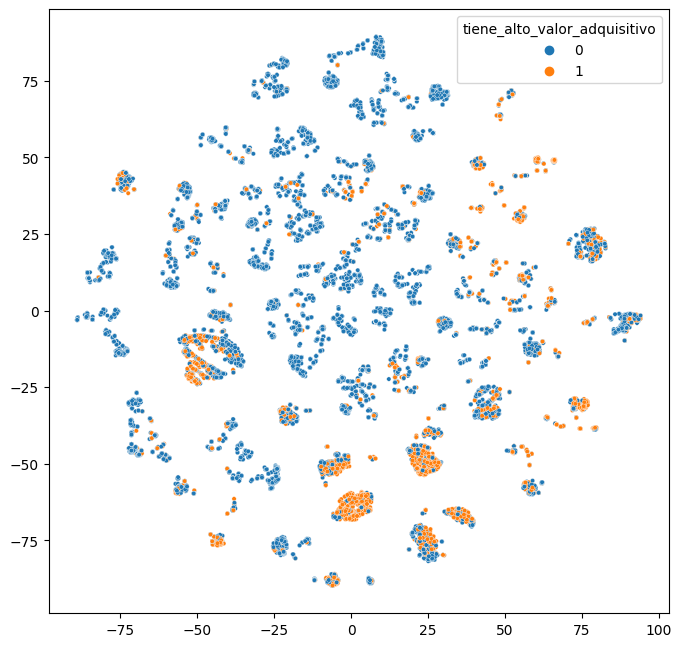

In [70]:
fig = plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(
    x = X_tsne[:,0],
    y = X_tsne[:,1],
    hue = y_train,
    s=10
)

plt.show()

Viendo el resultado de TSNE parecen haber pequeños clusters, por lo que, KNN podría funcionar correctamente. Veamos:

In [145]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1,21),
          'weights': ('uniform', 'distance'),
          'algorithm': ['ball_tree', 'kd_tree'],
          'p': [1, 2]}
gscv70 = GridSearchCV(knn, params, scoring='accuracy', n_jobs=6, verbose=4)

In [87]:
gscv70.fit(X_train70, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    7.3s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:   46.9s
[Parallel(n_jobs=6)]: Done 209 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 380 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 601 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:  4.8min finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': range(1, 21), 'p': [1, 2],
                         'weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=4)

In [92]:
print(gscv70.best_estimator_)
print(gscv70.best_params_)
print(gscv70.best_score_)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=18)
{'algorithm': 'ball_tree', 'n_neighbors': 18, 'p': 2, 'weights': 'uniform'}
0.8295249795249795


In [95]:
print(classification_report(y_test,gscv70.predict(X_test70)))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6186
           1       0.71      0.54      0.61      1955

    accuracy                           0.83      8141
   macro avg       0.78      0.73      0.75      8141
weighted avg       0.83      0.83      0.83      8141



Un accuracy decente para test. Veamos qué más se puede obtener

### 75% de la varianza

Se alcanza con 17 variables de PCA.

In [97]:
pca = PCA(17)
scaler = StandardScaler()

X_train75 = pd.DataFrame(pca.fit_transform(scaler.fit_transform(X_train)))
X_test75 = pd.DataFrame(pca.transform(scaler.transform(X_test)))

Veamos si TSNE nos dice algo:

In [99]:
X_tsne = TSNE(n_components=2, perplexity=100, learning_rate=400, n_iter_without_progress=500, n_jobs=6, verbose=4).fit_transform(X_train75)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 24420 samples in 0.058s...
[t-SNE] Computed neighbors for 24420 samples in 4.630s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24420
[t-SNE] Computed conditional probabilities for sample 2000 / 24420
[t-SNE] Computed conditional probabilities for sample 3000 / 24420
[t-SNE] Computed conditional probabilities for sample 4000 / 24420
[t-SNE] Computed conditional probabilities for sample 5000 / 24420
[t-SNE] Computed conditional probabilities for sample 6000 / 24420
[t-SNE] Computed conditional probabilities for sample 7000 / 24420
[t-SNE] Computed conditional probabilities for sample 8000 / 24420
[t-SNE] Computed conditional probabilities for sample 9000 / 24420
[t-SNE] Computed conditional probabilities for sample 10000 / 24420
[t-SNE] Computed conditional probabilities for sample 11000 / 24420
[t-SNE] Computed conditional probabilities for sample 12000 / 24420
[t-SNE] Computed conditional probabilities for sa

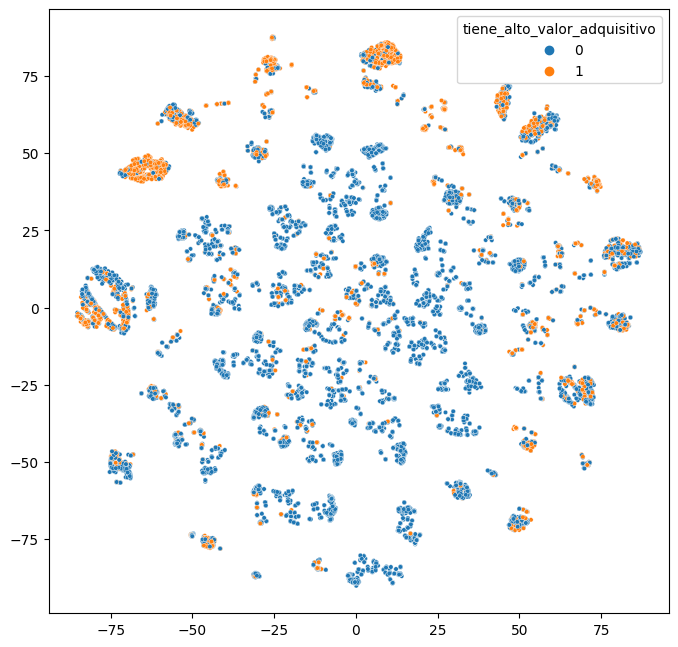

In [102]:
fig = plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(
    x = X_tsne[:,0],
    y = X_tsne[:,1],
    hue = y_train,
    s=10
)

plt.show()

Parece haber una buena separación, veamos qué hace KNN

In [103]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1,21),
          'weights': ('uniform', 'distance'),
          'algorithm': ['ball_tree', 'kd_tree'],
          'p': [1, 2]}
gscv75 = GridSearchCV(knn, params, scoring='accuracy', n_jobs=6, verbose=4)

In [104]:
gscv75.fit(X_train75, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 209 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 380 tasks      | elapsed:  5.0min
[Parallel(n_jobs=6)]: Done 601 tasks      | elapsed:  5.7min
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:  6.3min finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': range(1, 21), 'p': [1, 2],
                         'weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=4)

In [106]:
print(gscv75.best_estimator_)
print(gscv75.best_params_)
print(gscv75.best_score_)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20)
{'algorithm': 'ball_tree', 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}
0.8303439803439803


In [108]:
print(classification_report(y_test,gscv75.predict(X_test75)))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6186
           1       0.71      0.53      0.61      1955

    accuracy                           0.83      8141
   macro avg       0.78      0.73      0.75      8141
weighted avg       0.82      0.83      0.83      8141



Vemos que la predicción fue similar a la anteriormente obtenida.

### 80% de la varianza

In [109]:
pca = PCA(21)
scaler = StandardScaler()

X_train80 = pd.DataFrame(pca.fit_transform(scaler.fit_transform(X_train)))
X_test80 = pd.DataFrame(pca.transform(scaler.transform(X_test)))

In [111]:
X_tsne = TSNE(n_components=2, perplexity=100, learning_rate=400, n_iter_without_progress=500, n_jobs=6, verbose=4).fit_transform(X_train80)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 24420 samples in 0.074s...
[t-SNE] Computed neighbors for 24420 samples in 4.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24420
[t-SNE] Computed conditional probabilities for sample 2000 / 24420
[t-SNE] Computed conditional probabilities for sample 3000 / 24420
[t-SNE] Computed conditional probabilities for sample 4000 / 24420
[t-SNE] Computed conditional probabilities for sample 5000 / 24420
[t-SNE] Computed conditional probabilities for sample 6000 / 24420
[t-SNE] Computed conditional probabilities for sample 7000 / 24420
[t-SNE] Computed conditional probabilities for sample 8000 / 24420
[t-SNE] Computed conditional probabilities for sample 9000 / 24420
[t-SNE] Computed conditional probabilities for sample 10000 / 24420
[t-SNE] Computed conditional probabilities for sample 11000 / 24420
[t-SNE] Computed conditional probabilities for sample 12000 / 24420
[t-SNE] Computed conditional probabilities for sa

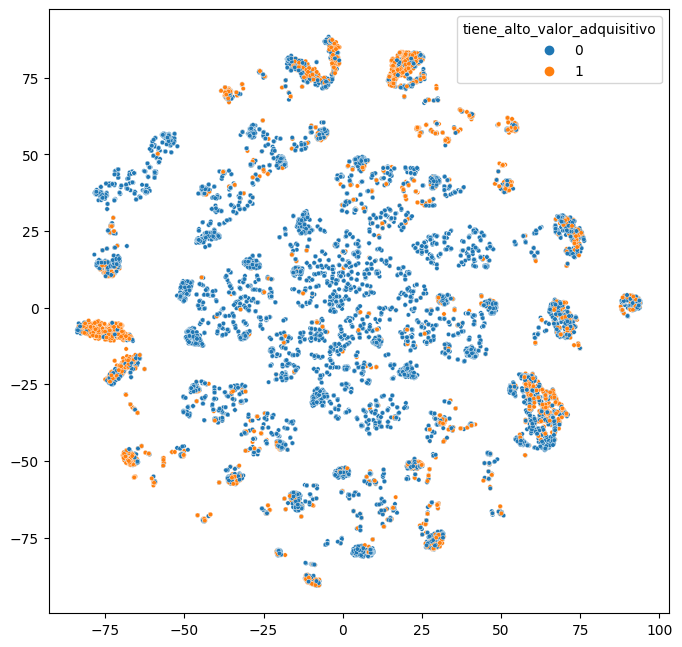

In [113]:
fig = plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(
    x = X_tsne[:,0],
    y = X_tsne[:,1],
    hue = y_train,
    s=10
)

plt.show()

El resultado parece ser similar a lo previamente observado...

In [114]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1,41),
          'weights': ('uniform', 'distance'),
          'algorithm': ['ball_tree', 'kd_tree'],
          'p': [1, 2]}
gscv80 = GridSearchCV(knn, params, scoring='accuracy', n_jobs=6, verbose=4)

In [115]:
gscv80.fit(X_train80, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   15.9s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 209 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 380 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 601 tasks      | elapsed: 12.4min
[Parallel(n_jobs=6)]: Done 870 tasks      | elapsed: 17.1min
[Parallel(n_jobs=6)]: Done 1189 tasks      | elapsed: 18.4min
[Parallel(n_jobs=6)]: Done 1556 tasks      | elapsed: 20.8min
[Parallel(n_jobs=6)]: Done 1600 out of 1600 | elapsed: 21.2min finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': range(1, 41), 'p': [1, 2],
                         'weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=4)

In [116]:
print(gscv80.best_estimator_)
print(gscv80.best_params_)
print(gscv80.best_score_)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=29, p=1)
{'algorithm': 'ball_tree', 'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}
0.8304258804258804


In [118]:
print(classification_report(y_test,gscv80.predict(X_test80)))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6186
           1       0.69      0.56      0.62      1955

    accuracy                           0.84      8141
   macro avg       0.78      0.74      0.76      8141
weighted avg       0.83      0.84      0.83      8141



Bastante similar

Veamos rápidamente qué sucede realizando búsquedas similares con las divisiones que faltan:

In [120]:
pca = PCA(25)
scaler = StandardScaler()

X_train85 = pd.DataFrame(pca.fit_transform(scaler.fit_transform(X_train)))
X_test85 = pd.DataFrame(pca.transform(scaler.transform(X_test)))

pca = PCA(30)
scaler = StandardScaler()

X_train90 = pd.DataFrame(pca.fit_transform(scaler.fit_transform(X_train)))
X_test90 = pd.DataFrame(pca.transform(scaler.transform(X_test)))

pca = PCA(39)
scaler = StandardScaler()

X_train95 = pd.DataFrame(pca.fit_transform(scaler.fit_transform(X_train)))
X_test95 = pd.DataFrame(pca.transform(scaler.transform(X_test)))

In [121]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1,41),
          'weights': ('uniform', 'distance'),
          'algorithm': ['ball_tree', 'kd_tree'],
          'p': [1, 2]}

gscv85 = GridSearchCV(knn, params, scoring='accuracy', n_jobs=6, verbose=4)
gscv90 = GridSearchCV(knn, params, scoring='accuracy', n_jobs=6, verbose=4)
gscv95 = GridSearchCV(knn, params, scoring='accuracy', n_jobs=6, verbose=4)

In [122]:
gscv85.fit(X_train85, y_train)
gscv90.fit(X_train90, y_train)
gscv95.fit(X_train95, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   24.9s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 209 tasks      | elapsed:  6.3min
[Parallel(n_jobs=6)]: Done 380 tasks      | elapsed: 11.3min
[Parallel(n_jobs=6)]: Done 601 tasks      | elapsed: 18.0min
[Parallel(n_jobs=6)]: Done 870 tasks      | elapsed: 24.5min
[Parallel(n_jobs=6)]: Done 1189 tasks      | elapsed: 26.8min
[Parallel(n_jobs=6)]: Done 1556 tasks      | elapsed: 30.4min
[Parallel(n_jobs=6)]: Done 1600 out of 1600 | elapsed: 30.8min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   26.9s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 209 tasks      | elapsed:  7.2min
[Parallel(n_jobs=6)]: Done 380 tasks      | elapsed: 13.6min
[Parallel(n_jobs=6)]: Done 601 tasks      | elapsed: 22.3min
[Parallel(n_jobs=6)]: Done 870 tasks      | elapsed: 30.3min
[Parallel(n_jobs=6)]: Done 1189 tasks      | elapsed: 33.5min
[Parallel(n_jobs=6)]: Done 1556 tasks      | elapsed: 39.1min
[Parallel(n_jobs=6)]: Done 1600 out of 1600 | elapsed: 39.8min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   46.6s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 209 tasks      | elapsed: 10.6min
[Parallel(n_jobs=6)]: Done 380 tasks      | elapsed: 19.6min
[Parallel(n_jobs=6)]: Done 601 tasks      | elapsed: 31.5min
[Parallel(n_jobs=6)]: Done 870 tasks      | elapsed: 43.1min
[Parallel(n_jobs=6)]: Done 1189 tasks      | elapsed: 49.4min
[Parallel(n_jobs=6)]: Done 1556 tasks      | elapsed: 59.5min
[Parallel(n_jobs=6)]: Done 1600 out of 1600 | elapsed: 60.8min finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': range(1, 41), 'p': [1, 2],
                         'weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=4)

In [124]:
print("Modelo 85%")
print(gscv85.best_estimator_)
print(gscv85.best_params_)
print(gscv85.best_score_)

print("Modelo 90%")
print(gscv90.best_estimator_)
print(gscv90.best_params_)
print(gscv90.best_score_)

print("Modelo 95%")
print(gscv95.best_estimator_)
print(gscv95.best_params_)
print(gscv95.best_score_)

Modelo 85%
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=38, p=1)
{'algorithm': 'ball_tree', 'n_neighbors': 38, 'p': 1, 'weights': 'uniform'}
0.8303030303030303
Modelo 90%
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=36, p=1)
{'algorithm': 'ball_tree', 'n_neighbors': 36, 'p': 1, 'weights': 'uniform'}
0.8291973791973792
Modelo 95%
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=27)
{'algorithm': 'ball_tree', 'n_neighbors': 27, 'p': 2, 'weights': 'uniform'}
0.8353398853398855


In [125]:
print(classification_report(y_test,gscv85.predict(X_test85)))
print("\n\n")
print(classification_report(y_test,gscv90.predict(X_test90)))
print("\n\n")
print(classification_report(y_test,gscv95.predict(X_test95)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6186
           1       0.69      0.54      0.61      1955

    accuracy                           0.83      8141
   macro avg       0.78      0.73      0.75      8141
weighted avg       0.82      0.83      0.83      8141




              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6186
           1       0.69      0.54      0.60      1955

    accuracy                           0.83      8141
   macro avg       0.78      0.73      0.75      8141
weighted avg       0.82      0.83      0.82      8141




              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6186
           1       0.70      0.56      0.62      1955

    accuracy                           0.84      8141
   macro avg       0.79      0.74      0.76      8141
weighted avg       0.83      0.84      0.83      8141



### Veamos menos varianza explicada.

In [133]:
for i in np.linspace(0.15, 0.50, 8):
    n = np.argmax(np.cumsum(pca.explained_variance_ratio_) > round(i, 2))
    print("Cantidad necesaria para explicar " + str(round(i, 2)) + "\tes " + str(n))

Cantidad necesaria para explicar 0.15	es 1
Cantidad necesaria para explicar 0.2	es 1
Cantidad necesaria para explicar 0.25	es 2
Cantidad necesaria para explicar 0.3	es 3
Cantidad necesaria para explicar 0.35	es 4
Cantidad necesaria para explicar 0.4	es 5
Cantidad necesaria para explicar 0.45	es 6
Cantidad necesaria para explicar 0.5	es 7


In [134]:
pca = PCA(2)
scaler = StandardScaler()

X_train25 = pd.DataFrame(pca.fit_transform(scaler.fit_transform(X_train)))
X_test25 = pd.DataFrame(pca.transform(scaler.transform(X_test)))

In [135]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1,41),
          'weights': ('uniform', 'distance'),
          'algorithm': ['ball_tree', 'kd_tree'],
          'p': [1, 2]}

gscv25 = GridSearchCV(knn, params, scoring='accuracy', n_jobs=6, verbose=4)

In [136]:
gscv25.fit(X_train25, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 209 tasks      | elapsed:    7.6s
[Parallel(n_jobs=6)]: Done 380 tasks      | elapsed:   14.5s
[Parallel(n_jobs=6)]: Done 601 tasks      | elapsed:   26.7s
[Parallel(n_jobs=6)]: Done 870 tasks      | elapsed:   40.3s
[Parallel(n_jobs=6)]: Done 1189 tasks      | elapsed:   50.0s
[Parallel(n_jobs=6)]: Done 1556 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 1600 out of 1600 | elapsed:  1.1min finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': range(1, 41), 'p': [1, 2],
                         'weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=4)

In [139]:
print("Modelo 25%")
print(gscv25.best_estimator_)
print(gscv25.best_params_)
print(gscv25.best_score_)

Modelo 25%
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=40)
{'algorithm': 'ball_tree', 'n_neighbors': 40, 'p': 2, 'weights': 'uniform'}
0.8170352170352171


In [138]:
print(classification_report(y_test,gscv25.predict(X_test25)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      6186
           1       0.68      0.50      0.57      1955

    accuracy                           0.82      8141
   macro avg       0.77      0.71      0.73      8141
weighted avg       0.81      0.82      0.81      8141



### 40% de la varianza explicada

In [140]:
pca = PCA(5)
scaler = StandardScaler()

X_train40 = pd.DataFrame(pca.fit_transform(scaler.fit_transform(X_train)))
X_test40 = pd.DataFrame(pca.transform(scaler.transform(X_test)))

In [141]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1,41),
          'weights': ('uniform', 'distance'),
          'algorithm': ['ball_tree', 'kd_tree'],
          'p': [1, 2]}

gscv40 = GridSearchCV(knn, params, scoring='accuracy', n_jobs=6, verbose=4)

In [142]:
gscv40.fit(X_train40, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:    7.5s
[Parallel(n_jobs=6)]: Done 209 tasks      | elapsed:   18.0s
[Parallel(n_jobs=6)]: Done 380 tasks      | elapsed:   34.4s
[Parallel(n_jobs=6)]: Done 601 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 870 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 1189 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 1556 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 1600 out of 1600 | elapsed:  2.3min finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': range(1, 41), 'p': [1, 2],
                         'weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=4)

In [143]:
print("Modelo 25%")
print(gscv40.best_estimator_)
print(gscv40.best_params_)
print(gscv40.best_score_)

Modelo 25%
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=36, p=1)
{'algorithm': 'kd_tree', 'n_neighbors': 36, 'p': 1, 'weights': 'uniform'}
0.8278050778050778


In [144]:
print(classification_report(y_test,gscv40.predict(X_test40)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6186
           1       0.68      0.52      0.59      1955

    accuracy                           0.83      8141
   macro avg       0.77      0.72      0.74      8141
weighted avg       0.82      0.83      0.82      8141

